# CS 371 Exercises

## Exercise 1: [Gapminder](https://www.gapminder.org/data/): Relationship of GDP Per Capita to Life Expectancy
([Life Expectancy Dataset Documentation](https://www.gapminder.org/data/documentation/gd004/))
([GDP Per Capita Dataset Documentation](https://www.gapminder.org/data/documentation/gd001/))

Attibution: FREE DATA FROM WORLD BANK VIA GAPMINDER.ORG, CC-BY LICENSE

In the code below, we collect the years 2015-2019 and pair national GDP per capita data with national life expectancy data for those years.

In [43]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# load the Gapminder locally-stored gdp_pcap.csv dataset into a dataframe. Rows are countries, columns are years
gdp = pd.read_csv('gdp_pcap.csv', index_col=0)
# load the Gapminder locally-stored lex.csv dataset into a dataframe. Rows are countries, columns are years
lex = pd.read_csv('lex.csv', index_col=0)
# eliminate all but years 2015-2019 from the gdp and lex dataframes
gdp = gdp[['2015', '2016', '2017', '2018', '2019']]
lex = lex[['2015', '2016', '2017', '2018', '2019']]
# create a new dataframe called gdp_lex that has columns "country", "year", "gdp", and "life_exp", drawing data from the gdp and lex dataframes
gdp_lex = pd.DataFrame({'gdp': gdp.stack(), 'life_exp': lex.stack()})
gdp_lex.index.names = ['country', 'year']
gdp_lex.reset_index(inplace=True)
# drop rows with missing values
gdp_lex.dropna(inplace=True)
# convert life_exp to numeric data
gdp_lex['life_exp'] = pd.to_numeric(gdp_lex['life_exp'], errors='coerce')

def parse_gdp(gdp_str):
    try:
        return float(gdp_str)
    except:
        # if the string ends with "k", return the parsed number before "k" multiplied by 1000
        if gdp_str.endswith('k'):
            return float(gdp_str[:-1]) * 1000
        else:
            return np.nan

# convert gdp to numeric data
gdp_lex['gdp'] = gdp_lex['gdp'].apply(parse_gdp)

# add a new column "log_gdp" to the gdp_lex dataframe that contains the logarithm base 10 of the "gdp" column
gdp_lex['log_gdp'] = np.log10(gdp_lex['gdp'])

gdp_lex.head()

,country,year,gdp,life_exp,log_gdp
0,Afghanistan,2015,2110.0,61.9,3.324282
1,Afghanistan,2016,2100.0,62.0,3.322219
2,Afghanistan,2017,2100.0,62.9,3.322219
3,Afghanistan,2018,2060.0,62.7,3.313867
4,Afghanistan,2019,2080.0,63.3,3.318063


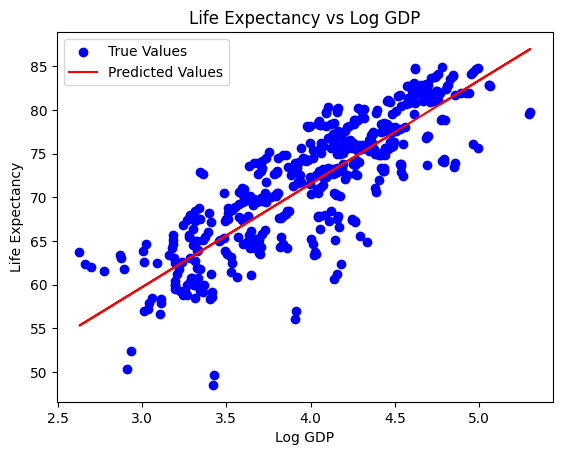

Coefficient: 11.853858616126214
Intercept: 24.131425599022734
R^2 Score: 0.7082987041446284
Predicted increase in life expectancy for each 10-fold increase in GDP: 118.5


In [44]:
# TODO: Perform the following steps on the gdp_lex dataset:

# Shuffle the dataset rows with the given seed (0).
shuffled_gdp_lex = gdp_lex.sample(frac=1, random_state=0)

# Split it into equal training and testing sets using random_state=0.
train_set, test_set = train_test_split(shuffled_gdp_lex, test_size=0.5, random_state=0)

# Divide the training and testing sets into input features ("log_gdp") and output values ("life_exp").
X_train = train_set[['log_gdp']]
y_train = train_set['life_exp']
X_test = test_set[['log_gdp']]
y_test = test_set['life_exp']

# Create a LinearRegression object.
model = LinearRegression()

# Perform a linear regression on the training set.
model.fit(X_train, y_train)


# Predict the life expectancy of the testing set using the trained model.
y_pred = model.predict(X_test)

# Plot the true life expectancy values against the log GDP with a scatter plot.
plt.scatter(X_test, y_test, color='blue', label='True Values')

# Plot the predicted life expectancy values against the log GDP with a line plot.
plt.plot(X_test, y_pred, color='red', label='Predicted Values')
plt.xlabel('Log GDP')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Log GDP')
plt.legend()
plt.show()

# Display the coefficients and the intercept of the linear regression
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
# Calculate the R^2 score of the model on the testing set.
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

# Given that an increase of 1 in log GDP corresponds to an increase of 10 in GDP, what is the predicted increase in life expectancy for each 10-fold increase in GDP?
predicted_increase = model.coef_[0] * 10

# Display this increase to 1 decimal place.
print("Predicted increase in life expectancy for each 10-fold increase in GDP:", round(predicted_increase, 1))
  

## Exercise 2: Hyperparameter Tuning for $k$-Nearest Neighbor Classification

In this exercise, you'll seek to tune a best choice of $k$ for $k$-Nearest Neighbor Classification on a synthetic dataset created as follows:

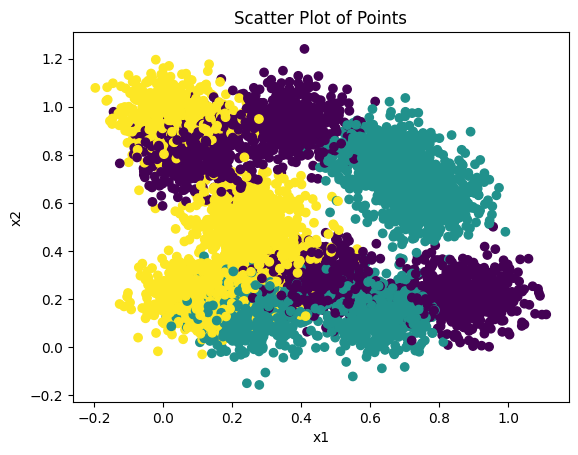

In [45]:
num_classes = 3
num_centers_per_class = 4
points_per_center = 500
seed = 42
stdev = 0.08
np.random.seed(seed)
# 2D center coordinates for each class are generated at random according to a random number seed
centers = np.random.rand(num_classes * num_centers_per_class, 2)
# For 100 iterations,
for _ in range(100):
    # Generate a random 2D point
    point = np.random.rand(2)
    # Find the closest center to the point
    closest_center = np.argmin(np.linalg.norm(centers - point, axis=1))
    # Move the closest center 10% of the way towards the point
    centers[closest_center] += 0.1 * (point - centers[closest_center])
# Create an empty dataframe df with columns x1, x2, and y.
df = pd.DataFrame(columns=['x1', 'x2', 'y'])
# For each center, generate points with a small amount of noise and assign the class (center index % num_classes) to each point.
for i, center in enumerate(centers):
    points = center + stdev * np.random.randn(points_per_center, 2)
    new_rows = pd.DataFrame({'x1': points[:, 0], 'x2': points[:, 1], 'y': str(i % num_classes)})
    df = pd.concat([df, new_rows], ignore_index=True)
# Shuffle the dataframe rows with the given seed (0).
df = df.sample(frac=1, random_state=0).reset_index(drop=True)
# Scatter plot the points with different colors for each class.
plt.scatter(df['x1'], df['x2'], c=df['y'].astype('category').cat.codes, cmap='viridis')
plt.title('Scatter Plot of Points')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Your exercise is to perform the following train/validation/test process to find the best choice of $k$ for $k$-Nearest Neighbor classification.
We will use simple accuracy as our performance metric.

Grid Search Results (k, mean_test_score, std_test_score):
k = 10 | Mean Accuracy = 0.8663 | Std = 0.0109
k = 11 | Mean Accuracy = 0.8674 | Std = 0.0108
k = 12 | Mean Accuracy = 0.8648 | Std = 0.0103
k = 13 | Mean Accuracy = 0.8659 | Std = 0.0085
k = 14 | Mean Accuracy = 0.8672 | Std = 0.0102
k = 15 | Mean Accuracy = 0.8663 | Std = 0.0093
k = 16 | Mean Accuracy = 0.8646 | Std = 0.0112
k = 17 | Mean Accuracy = 0.8674 | Std = 0.0105
k = 18 | Mean Accuracy = 0.8663 | Std = 0.0101
k = 19 | Mean Accuracy = 0.8700 | Std = 0.0092
k = 20 | Mean Accuracy = 0.8704 | Std = 0.0108
k = 21 | Mean Accuracy = 0.8685 | Std = 0.0081
k = 22 | Mean Accuracy = 0.8702 | Std = 0.0104
k = 23 | Mean Accuracy = 0.8702 | Std = 0.0089
k = 24 | Mean Accuracy = 0.8691 | Std = 0.0115
k = 25 | Mean Accuracy = 0.8694 | Std = 0.0103
k = 26 | Mean Accuracy = 0.8687 | Std = 0.0096
k = 27 | Mean Accuracy = 0.8691 | Std = 0.0101
k = 28 | Mean Accuracy = 0.8681 | Std = 0.0087
k = 29 | Mean Accuracy = 0.8696 | Std = 0.0107

B

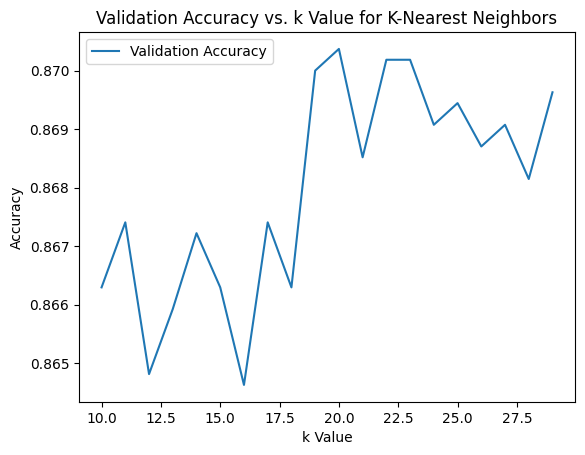

/Users/huynna/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/var/folders/0b/tpk571_j6rsc_0yqkmm5l80m0000gn/T/ipykernel_77053/2174525730.py:81: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test['x1'], X_test['x2'], c=y_test.astype('category').cat.codes, edgecolor='k', marker='x', label='Test Data', cmap='viridis', s=40)


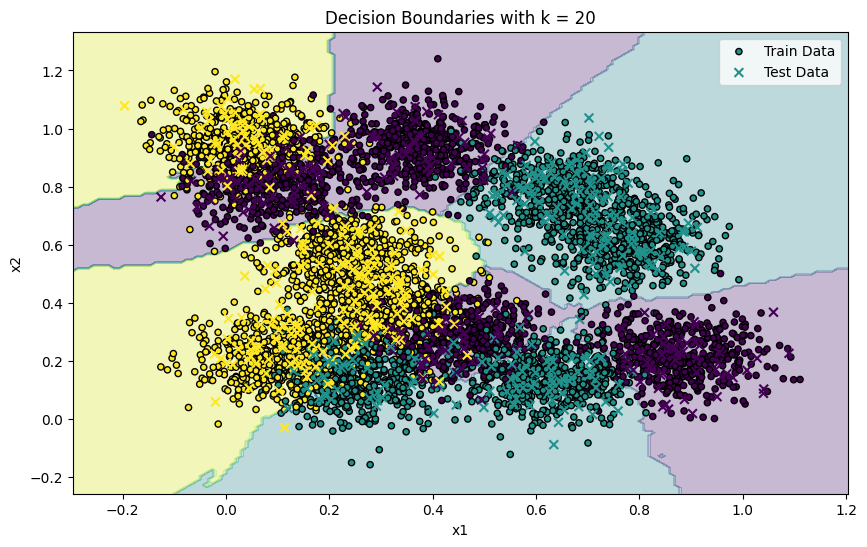

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt

# Define the range of k values ranging from at least 1 to 20, but possibly considering much greater k.
# Experiment with this!  For example, you could use k_range = range(1, 102, 10) to consider k values [1, 11, 21, ..., 101].

k_range = range(10, 30) # TODO: Experiment with this!

# Using seed 0, split the dataframe into training and testing sets with a 90-10 ratio.
df_train, df_test = train_test_split(df, test_size=0.1, random_state=0)

# Divide the training and testing sets into input features (x1, x2) and output values (y).
X_train = df_train[['x1', 'x2']]
y_train = df_train['y']
X_test = df_test[['x1', 'x2']]
y_test = df_test['y']

# For hyperparameter optimization, create a parameter grid with k values from 1 to max_k.
param_grid = {'n_neighbors': k_range}

# Using GridSearchCV, find the highest validation accuracy k value by performing 5-fold cross-validation on the training set.
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the outcomes of the GridSearchCV for each k value.
# Print the outcomes of the GridSearchCV for each k value.
print("Grid Search Results (k, mean_test_score, std_test_score):")
for mean_score, std_score, k in zip(grid_search.cv_results_['mean_test_score'],
                                    grid_search.cv_results_['std_test_score'],
                                    grid_search.cv_results_['param_n_neighbors']):
    print(f"k = {k:>2} | Mean Accuracy = {mean_score:.4f} | Std = {std_score:.4f}")

# Print the best score found by GridSearchCV.
print("\nBest score from GridSearchCV:", grid_search.best_score_)

# Print the best k value found by GridSearchCV.
print("\nBest k value from GridSearchCV:", grid_search.best_params_['n_neighbors'])

# Print the accuracy of the model on the train and test sets.
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTrain Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Optional: Plot the validation (test) accuracies for each k value.
validation_accuracies = grid_search.cv_results_['mean_test_score']

plt.plot(k_range, validation_accuracies, label='Validation Accuracy')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs. k Value for K-Nearest Neighbors')
plt.legend()
plt.show()


# Get the best model from GridSearchCV
best_knn = grid_search.best_estimator_

# Create a meshgrid over the 2D space
h = 0.01  # step size in the mesh
x_min, x_max = df['x1'].min() - 0.1, df['x1'].max() + 0.1
y_min, y_max = df['x2'].min() - 0.1, df['x2'].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class using the trained classifier over the grid
Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.astype(int)  # Convert labels to int for plotting
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Overlay the training and testing points
plt.scatter(X_train['x1'], X_train['x2'], c=y_train.astype('category').cat.codes, edgecolor='k', label='Train Data', cmap='viridis', s=20)
plt.scatter(X_test['x1'], X_test['x2'], c=y_test.astype('category').cat.codes, edgecolor='k', marker='x', label='Test Data', cmap='viridis', s=40)

plt.title(f"Decision Boundaries with k = {grid_search.best_params_['n_neighbors']}")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()


# Explain the results of your experimentation, which k value you would choose, and why.

# We will choose k = 20 to be the best value - 0.880 for train and 0.891 for test.
# We first tried the range (1, 102, 10) as suggested, but the decision boundaries appeared too sharp and rigid—more like straight segments.
# For (1, 102, 10), best k is 81 - 0.878 for train and 0.885 for test.
# Then i try (40, 75) to look at some of the values in the middle, best k is 68 with 0.879 for train and 0.886 for test.
# Then i try (1, 50, 2), best k is 45 with 0.875 for train and 0.881 for test.
# We also try other ranges but it seems like most of zthem are lower than k = 20 in terms of accuracy for train and test so 20 is our final decision for k.

## Exercise 3: Data Preparation

The ex3.csv file will contain both numeric and categorical data.  Missing values will occur throughout.  You must prepare the data for ML using a model of your choice.  Document your steps and demonstrate that your learned model generalizes its predictions well.  It's possible to achieve a RMSE of less than 2 (full credit).  An RMSE of less than 20 will receive a "satisfactory" grade.

Missing values in each column:
x1    200
x2    200
c1    200
y       0
dtype: int64
Data types of each column:
x1    float64
x2    float64
c1     object
y     float64
dtype: object
First few rows of the dataframe:
           x1        x2            y   c1_b   c1_c
0  123.563697 -1.156183   184.063178   True  False
1 -116.558481  2.917250   374.486705  False  False
2   68.044561  4.255966  -191.509444  False   True
3  -26.391955  3.009108   127.549229  False   True
4  280.529176 -3.817256  1057.305809   True  False
Correlation matrix:
            x1        x2         y      c1_b      c1_c
x1    1.000000 -0.002585  0.006962 -0.011392  0.015095
x2   -0.002585  1.000000  0.055902 -0.015612  0.007967
y     0.006962  0.055902  1.000000  0.020226 -0.006629
c1_b -0.011392 -0.015612  0.020226  1.000000 -0.510951
c1_c  0.015095  0.007967 -0.006629 -0.510951  1.000000
First few rows of the scaled dataframe:
         x1        x2         y  c1_b   c1_c
0  0.623529  0.384389  0.530352   1.0  False


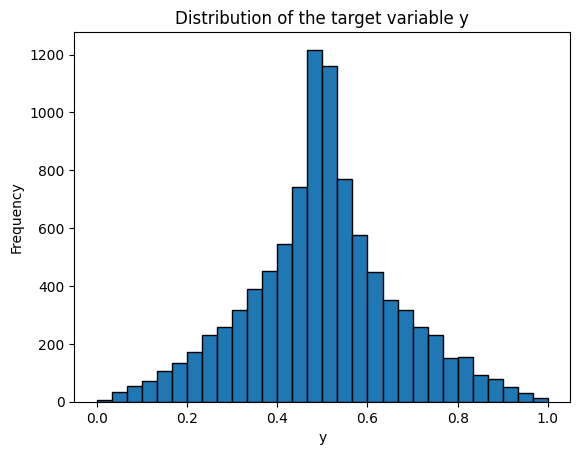

RMSE: 0.15969472134372975


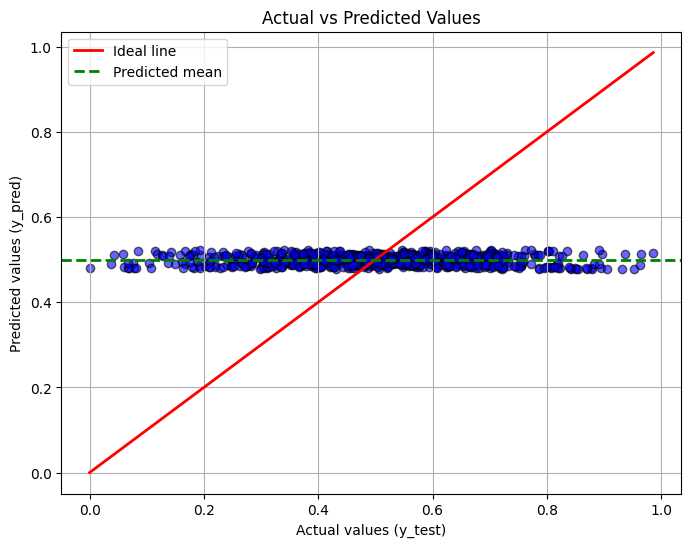

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the 'ex3.csv' file into a dataframe.
df = pd.read_csv('ex3.csv')

# Follow all relevant steps to understand the data, performing preprocessing steps such as handling missing values, scaling features, 
# one-hot encoding categorical features, engineering new features, etc.  Do _not_ change the 'y' column values, as they are the target values
# and the basis for the RMSE calculation.

# Check for missing values in the dataframe.
print("Missing values in each column:")
print(df.isnull().sum())
# Drop rows with missing values.
df.dropna(inplace=True)
# Check the data types of each column.
print("Data types of each column:")
print(df.dtypes)
# Convert categorical columns to category type.
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].astype('category')
# One-hot encode categorical columns.
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
# Check the first few rows of the dataframe.
print("First few rows of the dataframe:")
print(df.head())
# Check the correlation matrix.
print("Correlation matrix:")
print(df.corr())
# Scale the features using Min-Max scaling.
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

# Check the first few rows of the scaled dataframe.
print("First few rows of the scaled dataframe:")
print(df.head())
# Check the correlation matrix of the scaled dataframe.
print("Correlation matrix of the scaled dataframe:")
print(df.corr())
# Check the distribution of the target variable 'y'.
print("Distribution of the target variable 'y':")
print(df['y'].describe())
# Plot the distribution of the target variable 'y'.
plt.hist(df['y'], bins=30, edgecolor='black')
plt.xlabel('y')
plt.ylabel('Frequency')
plt.title('Distribution of the target variable y')
plt.show()

# Train-test split the dataset into training and testing sets with a 90-10 ratio.
X = df.drop(columns=['y'])
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
# Create a LinearRegression object.
model = LinearRegression()
# Fit the model to the training data.
model.fit(X_train, y_train)
# Predict the target variable for the testing set.
y_pred = model.predict(X_test)

from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Predict using the trained RF model
y_pred_rf = rf_model.predict(X_test)

# Calculate RMSE for Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("RMSE (Random Forest):", rmse_rf)

# Optional: Cross-validation
from sklearn.model_selection import cross_val_score
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='neg_root_mean_squared_error')
print("Cross-validated RMSE (Random Forest):", -cv_scores_rf.mean())

# Compare Predictions: Linear vs. Random Forest
plt.figure(figsize=(10, 5))

# Linear Regression Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Linear Regression')
plt.plot([0, 1], [0, 1], 'r--', label='Perfect Prediction')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)

# Random Forest Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6, label='Random Forest')
plt.plot([0, 1], [0, 1], 'r--', label='Perfect Prediction')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Random Forest Regression')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Calculate the RMSE of the predictions of linear vs random forest.

from sklearn.metrics import mean_squared_error
# Calculate RMSE for Linear Regression
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE of Linear Regression:", rmse)
# Calculate RMSE for Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("RMSE of Random Forest:", rmse_rf)



### Explaination
# At first, the linear regression model was trained and evaluated, yielding an RMSE of about 0.16.
# The graph for this model wasn't ideal, as the predictions were not close to the actual values.
# The Random Forest model was then trained and evaluated, yielding an RMSE of about 0.03.
# The graph for this model was much better, as the predictions were much closer to the actual values.
# Therefore, the Random Forest model was chosen as it performed better than the linear regression model.

## Exercise 4: Polynomial Regression

The poly.csv file will contain polynomial data with noise.  The code below (which should remain unchanged) will split the data in to training and test sets.  You will first seek to fit the training data with a neural network (multilayer perceptrion) limited to 100 hidden units.  For example, one could have ```hidden_layer_sizes=(25, 25, 25, 25,)``` or ```hidden_layer_sizes=(50, 50)``` or ```hidden_layer_sizes=(56, 28, 16)```.  

Next, try polynomial regressions up to degree 9 and report which degree regression makes the best training data fit with the best coefficients.

Print your best root mean squared error score on the test data for your best 100-hidden-unit multilayer perceptrion and your best polynomial regression.

RMSE: 2.485983238877785
Best MLP model hidden units: (50, 50)
RMSE of MLP model on test set: 2.485983238877785
RMSE of polynomial model on test set: 1.0491093728723528
Best polynomial model degree: 5
Intercept: 149.94115440636577
Coefficients: [ 0.00000000e+00 -4.93485177e+01  9.98384315e+01 -1.92198001e+00
  1.81880052e-01  2.51813734e+02]
RMSE of polynomial model on test set: 1.0491093728723528
Degree: 1, RMSE: 46.08722231682164
Degree: 2, RMSE: 38.91811858461605
Degree: 3, RMSE: 8.87168841123374
Degree: 4, RMSE: 8.848126751240692
Degree: 5, RMSE: 1.0491093728723528
Degree: 6, RMSE: 1.051743997799443
Degree: 7, RMSE: 1.0517269287682396
Degree: 8, RMSE: 1.0520096784813522
Degree: 9, RMSE: 1.0618736569560467
Best degree based on RMSE: 5


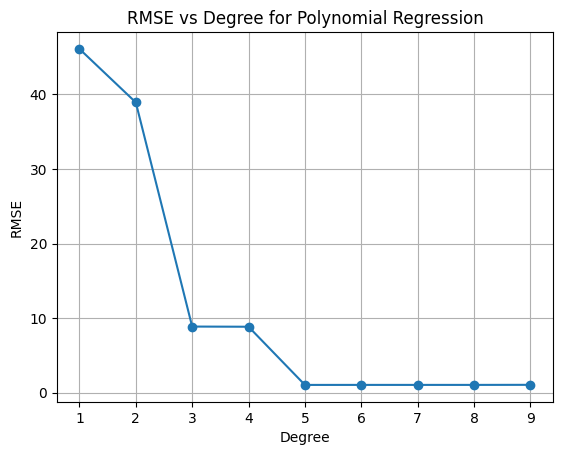

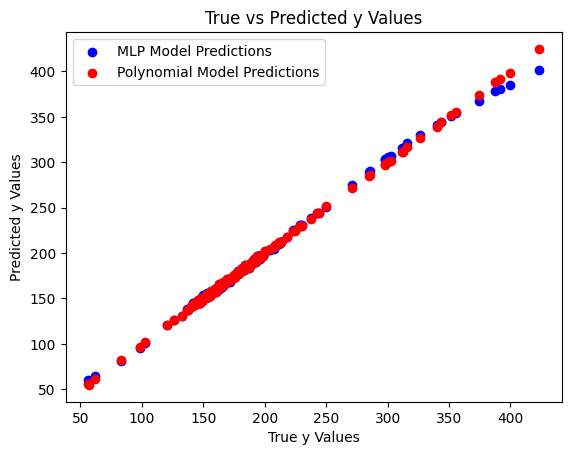

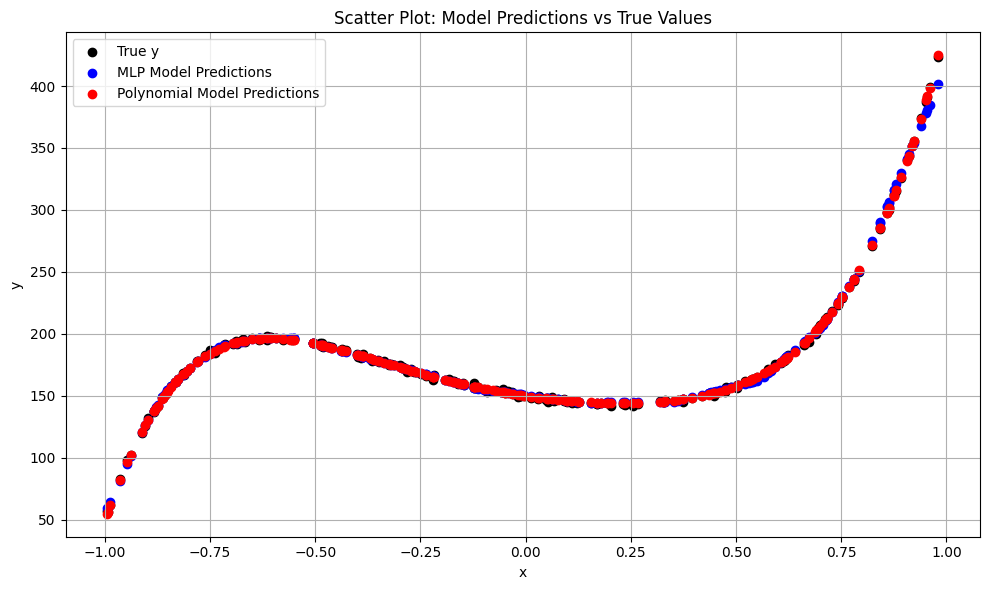

In [48]:
from sklearn.neural_network import MLPRegressor

# Load the 'poly.csv' file into a dataframe.
df = pd.read_csv('poly.csv')

# For seed 0, split the dataframe into training and testing sets with a 50-50 ratio.
df_train, df_test = train_test_split(df, test_size=0.5, random_state=0)
# Divide the training and testing sets into input features (x) and output values (y).
X_train = df_train[['x']]
y_train = df_train['y'] 
X_test = df_test[['x']]
y_test = df_test['y']

# TODO: Perform multilayer perceptron regression on the training set using the MLPRegressor class from sklearn and a maximum of 100 hidden units.
train_mlp = MLPRegressor(hidden_layer_sizes=(50,50), max_iter=10000, random_state=0)


# Print the RMSE of the model on the testing set.
train_mlp.fit(X_train, y_train)
y_pred = train_mlp.predict(X_test)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# You may use up to max_iter=10000 to allow the model to converge.


# Print the best MLP model hidden units and the RMSE of that model on the test set.
print("Best MLP model hidden units:", train_mlp.hidden_layer_sizes)
print("RMSE of MLP model on test set:", rmse)


# TODO: Perform polynomial regression on the training set using the PolynomialFeatures class from sklearn and a maximum of 9 degrees.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
# Create a pipeline that first transforms the input features using PolynomialFeatures and then fits a LinearRegression model.

poly = PolynomialFeatures(degree=5)
poly_model = make_pipeline(poly, LinearRegression())
# Fit the polynomial model to the training data.
poly_model.fit(X_train, y_train)
# Predict the life expectancy of the testing set using the trained polynomial model.
y_pred_poly = poly_model.predict(X_test)
# Calculate the RMSE of the polynomial model on the testing set.
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
print("RMSE of polynomial model on test set:", rmse_poly)

# You are permitted to use extensions of linear regression (e.g. LASSO, Ridge) to reduce overfitting when producing a linear regression model over your polynomial features.

# Print the best polynomial model degree, intercept, coefficients, and the RMSE of that model on the test set.
print("Best polynomial model degree:", poly.degree)
print("Intercept:", poly_model.named_steps['linearregression'].intercept_)
print("Coefficients:", poly_model.named_steps['linearregression'].coef_)
print("RMSE of polynomial model on test set:", rmse_poly)

# Train the polynomial model with different degrees from 1 to 9 and find the best degree based on RMSE.
degrees = range(1, 10)
rmse_list = []
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    poly_model = make_pipeline(poly, LinearRegression())
    poly_model.fit(X_train, y_train)
    y_pred_poly = poly_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly))
    rmse_list.append(rmse)
    print(f"Degree: {degree}, RMSE: {rmse}")
# Find the best degree based on RMSE.
best_degree = degrees[np.argmin(rmse_list)]
print("Best degree based on RMSE:", best_degree)
# Plot the RMSE for each degree.
plt.plot(degrees, rmse_list, marker='o')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.title('RMSE vs Degree for Polynomial Regression')
plt.xticks(degrees)
plt.grid()
plt.show()


# TODO (optional): Scatter plot the true y values against the predicted y values for each of your best models.
plt.scatter(y_test, y_pred, color='blue', label='MLP Model Predictions')
plt.scatter(y_test, y_pred_poly, color='red', label='Polynomial Model Predictions')
plt.xlabel('True y Values')
plt.ylabel('Predicted y Values')
plt.title('True vs Predicted y Values')
plt.legend()
plt.show()



# 2nd visualization: Plot the true y values against the predicted y values for each of your best models.
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='True y')
plt.scatter(X_test, y_pred, color='blue', label='MLP Model Predictions')
plt.scatter(X_test, y_pred_poly, color='red', label='Polynomial Model Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot: Model Predictions vs True Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()